In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir ravdess_data
!unzip 'gdrive/My Drive/Audio_Speech_Actors_01-24.zip' -d ravdess_data
!rm -rf ravdess_data/A*/03-01-02*

In [0]:
import os
import time
import numpy as np
import librosa
lst = []

start_time = time.time()
for folder in os.listdir('ravdess_data/'):
  for file in os.listdir(f'{"ravdess_data/"}{folder}'):
        try:
          X, sample_rate = librosa.load(f'{"ravdess_data/"}{folder}{"/"}{file}', res_type='kaiser_fast')
          mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
          file = int(file[7:8]) - 1
          if file>0:
            file-=1
          arr = mfccs, file
          lst.append(arr)
        except ValueError:
          continue

# print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

In [0]:
np.save('training_data_transposed_1d_ravdess', lst)

In [0]:
!cp training_data_transposed_1d_ravdess.npy 'gdrive/My Drive/AI-Hackathon'

In [0]:
lst = np.load('training_data_transposed_1d_ravdess.npy',allow_pickle=True)

In [0]:
X, y = zip(*lst)


In [104]:
# import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

set(y)

{0, 1, 2, 3, 4, 5, 6}

In [105]:
# !pip install oblib
# import joblib

# X_name = 'X.joblib'
# y_name = 'y.joblib'
# save_dir = '/content/drive/My Drive/ravdess_model'

# savedX = joblib.dump(X, os.path.join(save_dir, X_name))
# savedy = joblib.dump(y, os.path.join(save_dir, y_name))


import numpy as np
import joblib
# np.save('gdrive/My Drive/ravdess_model/x',X)
# np.save('gdrive/My Drive/ravdess_model/y',y)

X_old = joblib.load('gdrive/My Drive/ravdess_model/X.joblib')
y_old = joblib.load('gdrive/My Drive/ravdess_model/y.joblib')

X = []
y = []
for i in range(len(y_old)):
  if y_old[i]!=1:
    y.append(y_old[i])
    X.append(X_old[i])
for i in range(len(y)):
  if y[i]>1:
    y[i]-=1
set(y)


# array_rain_fall = np.loadtxt(fname="rain-fall.csv", delimiter=",")
# np.savetxt(fname="saved-rain-fall-row-col-names.csv", delimiter=",", X=array_rain_fall)

{0, 1, 2, 3, 4, 5, 6}

In [106]:
from fastai.basics import *
from fastai.vision import *
from sklearn.model_selection import train_test_split
import torch

class ArrayDataset(Dataset):
    "Sample numpy array dataset"
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = 2 # binary label
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]
      

X = np.asarray(X)
y = np.asarray(y)
X = np.expand_dims(X,axis=2)  
print(X.shape)
train_X,valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.utils import shuffle
train_X, train_y = shuffle(train_X, train_y, random_state=42)

# X = np.expand_dims(X,axis=2)
# print(train_y.shape,valid_y.shape)
# Load necessary Pytorch packages
# from torch.utils.data import DataLoader, TensorDataset
# from torch import Tensor

# # Create dataset from several tensors with matching first dimension
# # Samples will be drawn from the first dimension (rows)
# train_dataset = TensorDataset( Tensor(x_traincnn), Tensor(train_y) )
# valid_dataset = TensorDataset( Tensor(x_validcnn), Tensor(valid_y) )
# # Create a data loader from the dataset
# # Type of sampling and batch size are specified at this step
# train_loader = DataLoader(train_dataset, batch_size= 16, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size= 16, shuffle=True)

# # Quick test
# next(iter(train_loader))





# x_traincnn = torch.Tensor([x_traincnn,train_y])
# x_testcnn = torch.Tensor([x_testcnn,valid_y])
# # print(type(x_traincnn))
# print(x_traincnn)
# train_set,valid_set = ArrayDataset(train_X,train_y),ArrayDataset(valid_X,valid_y)

# train_data = []
# valid_data = []
# for i in range(len(train_X)):
#    train_data.append([train_X[i], train_y[i]])
# for i in range(len(valid_X)):
#    valid_data.append([valid_X[i], valid_y[i]])
    
    
# train_data = np.array(train_data)
# valid_data = np.array(valid_data)


# train_data = np.expand_dims(train_data, axis=2)
# valid_data = np.expand_dims(valid_data, axis=2)

# print(train_data.shape)

# trainloader = torch.utils.data.DataLoader(x_traincnn, batch_size=16,
#                                           shuffle=True, num_workers=2)
# validloader = torch.utils.data.DataLoader(x_validcnn, batch_size=16,
#                                           shuffle=True, num_workers=2)




(4177, 40, 1)


In [107]:
y.shape

(4177,)

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint



model = Sequential()

model.add(Conv1D(32, 5,strides=2,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 5,strides=2,padding='same',))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
# opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [111]:
cnnhistory=model.fit(train_X, train_y, batch_size=16, epochs=10, validation_data=(valid_X, valid_y))

Train on 3341 samples, validate on 836 samples
Epoch 1/10
3341/3341 [==============================] - 1s 259us/step - loss: 0.2745 - acc: 0.9087 - val_loss: 0.4219 - val_acc: 0.8385
Epoch 2/10
3341/3341 [==============================] - 1s 264us/step - loss: 0.2414 - acc: 0.9216 - val_loss: 0.3941 - val_acc: 0.8553
Epoch 3/10
3341/3341 [==============================] - 1s 247us/step - loss: 0.2127 - acc: 0.9336 - val_loss: 0.3517 - val_acc: 0.8756
Epoch 4/10
3341/3341 [==============================] - 1s 245us/step - loss: 0.1833 - acc: 0.9461 - val_loss: 0.3168 - val_acc: 0.9007
Epoch 5/10
3341/3341 [==============================] - 1s 242us/step - loss: 0.1798 - acc: 0.9434 - val_loss: 0.2771 - val_acc: 0.8971
Epoch 6/10
3341/3341 [==============================] - 1s 244us/step - loss: 0.1613 - acc: 0.9485 - val_loss: 0.2473 - val_acc: 0.9258
Epoch 7/10
3341/3341 [==============================] - 1s 241us/step - loss: 0.1235 - acc: 0.9683 - val_loss: 0.3162 - val_acc: 0.8923
E

In [0]:
model.save('1d_convolution_model_with_video_data_without_calm.h5')

In [0]:
\model_name = 'OnlyNeutral_Emotion_Voice_Detection_Model.h5'
save_dir = 'gdrive/My Drive/ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at gdrive/My Drive/ravdess_model/OnlyNeutral_Emotion_Voice_Detection_Model.h5 


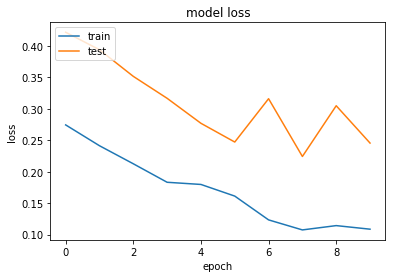

In [113]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [0]:
cp -R 'gdrive/My Drive/Filtered Data' .

In [0]:
!mv Tata-Training-Diarize/1 Tata-Training-Diarize/temp
!mv Tata-Training-Diarize/2 Tata-Training-Diarize/1
!mv Tata-Training-Diarize/temp Tata-Training-Diarize/2

In [0]:
i=0
test = []
for folder in os.listdir('Tata-Training-Diarize'):
  for file in os.listdir(f'{"Tata-Training-Diarize/"}{folder}'):
    try:
      X, sample_rate = librosa.load(f'{"Tata-Training-Diarize/"}{folder}{"/"}{file}', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

      arr = mfccs, int(folder)
      test.append(arr)
    except:
      continue

In [0]:
test_X, test_y = zip(*test)
test_X = np.asarray(test_X)
test_X = np.expand_dims(test_X,axis=2)
classes = ['Neutral','Happy','Sad','Angry','Fearful','Disgust','Surprise']

In [120]:
preds = model.predict_classes(test_X)
for i in range(len(preds)):
  print(classes[preds[i]], '     ',classes[test_y[i]])

Neutral       Sad
Neutral       Sad
Neutral       Happy
Neutral       Happy
Happy       Happy
Neutral       Happy
Happy       Happy
Neutral       Happy
Sad       Happy
Neutral       Fearful
Neutral       Angry
Neutral       Angry
Neutral       Angry
Neutral       Disgust
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Happy       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral
Neutral       Neutral


In [0]:
!mkdir train_new
!unzip 'gdrive/My Drive/Tata-Training-Diarize.zip' -d train_new  

In [117]:
X = test_X
y = np.asarray(test_y)
X.shape, y.shape

((30, 40, 1), (30,))

In [118]:
import numpy as np


print(X.shape)
train_X,valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=42)
# from sklearn.utils import shuffle
# train_X, train_y = shuffle(train_X, train_y, random_state=42)


(30, 40, 1)


In [122]:
train_y

array([0, 0, 3, 2, 1, 0, 1, 5, 3, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1])

In [119]:
cnnhistory=model.fit(train_X, train_y, batch_size=16, epochs=5, validation_data=(valid_X, valid_y))

Train on 24 samples, validate on 6 samples
Epoch 1/5
24/24 [==============================] - 0s 1ms/step - loss: 4.7646 - acc: 0.0417 - val_loss: 5.5944 - val_acc: 0.5000
Epoch 2/5
24/24 [==============================] - 0s 806us/step - loss: 2.2075 - acc: 0.2917 - val_loss: 5.3794 - val_acc: 0.5000
Epoch 3/5
24/24 [==============================] - 0s 646us/step - loss: 1.5849 - acc: 0.6250 - val_loss: 4.8784 - val_acc: 0.5000
Epoch 4/5
24/24 [==============================] - 0s 574us/step - loss: 1.3461 - acc: 0.6250 - val_loss: 4.9070 - val_acc: 0.3333
Epoch 5/5
24/24 [==============================] - 0s 896us/step - loss: 0.9164 - acc: 0.6667 - val_loss: 5.0237 - val_acc: 0.5000
